# The VGGNet

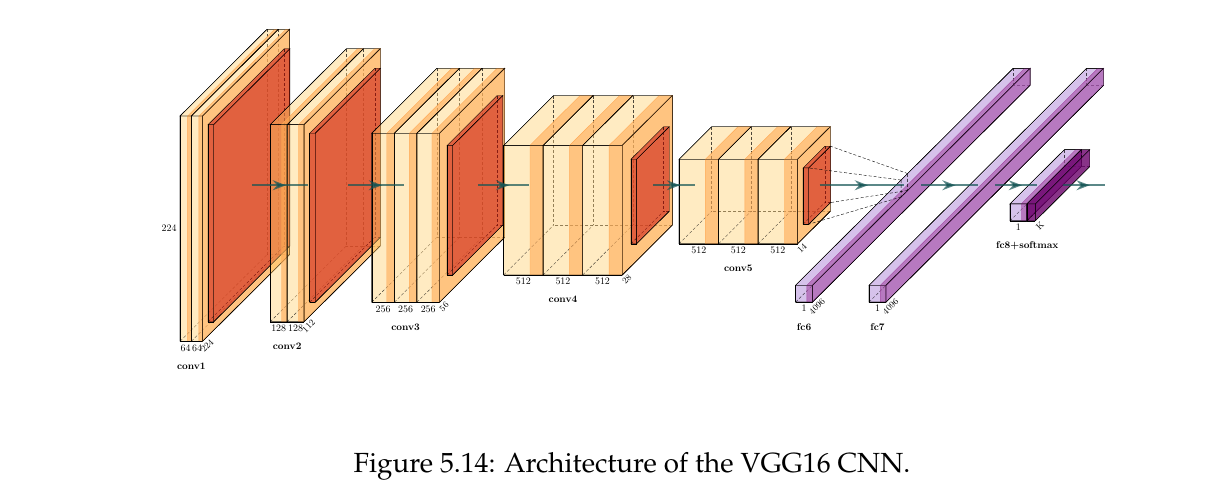

* VGG: Visual Geometry Group. Oxford
* Aca veremos la arquitectura VGG16. Hay mas, VGG19.
* El trabajo original fue
[publicado](https://arxiv.org/abs/1409.1556). Por Karen Simonyan y Andrew Zisserman.
* En comparacion con la anterior AlexNet.
    * Aca los filtros son 3x3 en AlexNet 5x5, 11x11
    * Aca hay mas capas convolucionales 11 mientras en el AlexNet hay 5.
    * Las capas convolucionales vienen por bloques de 2 y 3.
    2,2,3,3,3

* Primero y segundo lugar en el ImageNet Challenge en 2014.
* 14 millones de imagenes con 1000 categorias.

## Descripcion de la arquitectura
* **Capa de entrada y 2 convolucionales**: La capa de entrada es de $224\times 224 \times 3$. Las convoluciones (2) tiene 64 fitros seguidos de una MaxPooling.

* **segunda capa capa de 2 convoluciones y MaxPooling**: Son dos capas convolucionales de 128 filtros cada una y MaxPooling.

* **Tres capas convolucionales**: Cada una con 256 filtros seguidos por MaxPooling.

* **Cuarta capa: 3 redes convolucionales**: Con 512 filtros seguidos por MaxPooling.

* **Quinta capa**: 3 redes convolucionales de 512 filtros segudos por MaxPooling.

* **Flattening**. Con MaxPooling y 4096 componentes

* **Fully Connected** :4096 conectados con 4096.

* **Fully connected**: softmax 1000 en la original, 17 en el de los Oxford Flowers y 10 para MNIST.





## Implementacion del VGGNet con los datos MNIST


In [1]:
# version de tensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


In [5]:
# carguemos librerias
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocesiamiento. Normalizacion, reshape
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 25

# one hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# define the VGG like model
def vgg_like_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

    # flatten fully connected
    model.add(layers.Flatten())
    # Dense
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # output to 10 classes for MNIST
    model.add(layers.Dense(10, activation='softmax'))

    return model



In [6]:
# instantiate the model
model = vgg_like_model()

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8773 - loss: 0.3525 - val_accuracy: 0.9696 - val_loss: 0.5488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9831 - loss: 0.0605 - val_accuracy: 0.9818 - val_loss: 0.4092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9881 - loss: 0.0456 - val_accuracy: 0.9811 - val_loss: 0.5921
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9892 - loss: 0.0393 - val_accuracy: 0.9742 - val_loss: 0.4549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9924 - loss: 0.0296 - val_accuracy: 0.9837 - val_loss: 0.3858
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9918 - loss: 0.0294 - val_accuracy: 0.9520 - val_loss: 0.9972
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9920 - loss: 0.0283 - val_accuracy: 0.9810 - val_loss: 0.7556
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9936 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 1.0828
Test accuracy: 0.9789999723434448


## GoogLeNet
### Un poco de historia
* De desarrollo en Google
* Los autores
[Szegedy et. al](https://arxiv.org/abs/1409.4842).

* Esta ya es muy distinta de las anteriores. No es **secuencial**. Hay capas en **paralelo**.  Introduce
las convoluciones $1 \times 1$.
* Son familia **Inception Family**. Se crean con Inception blocks.

Veamos los inception blocks.

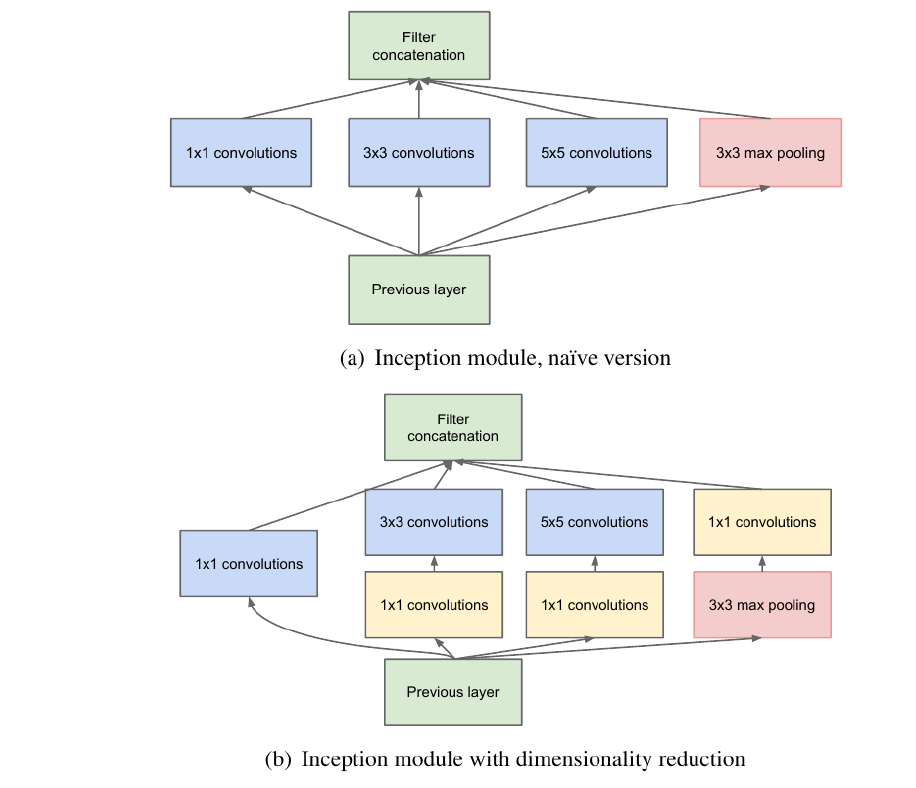

Brownlee (bibliografia en las notas de clase) dice que las convoluciones $1 \times 1$ las popularizo Min Lin, et. al, en 2013. La referencia al xarchive esta en las notas de clase.

Hay varias cosas para discutir sobre las convoluciones $1 \times 1$.

* Piense en un cubo de dimensiones $width \times height \times depth$ La convolucion $1 \times 1$ tumba una dimension del cubo por que la convolucion suma sobre la profundidad. La convolucion $1 \times 1$ basicamente "stack" los datos a lo largo de la dimension profundidad.
Es como un "avergePooling" pero a lo largo del canal.

Definamos las componentes $(i,j)$ de cada capa y
un filtro $f_{ijk}$ No pasa nada a lo largo de las dimensiones $i$, $j$.

Cuantitaviamente tenemos

$$\text{out}_{ij} = \sum_{\ell=1}^{k} f_{ij \ell} \text{in}_{ijl} $$

# Proxima clase: Extender estas ideas del $1 \times 1$
Hablar mas de las Inception. Programar cositas, pero no tengo un programa compleje.

